# ***EDA: Estadísticas de los jugadores de la NBA 2022-2023***

<div style="text-align: center;">
  <img src="nba.jpeg" alt="Texto alternativo" width="auto" height="400">
</div>

### **1.Introducción**

Este análisis se centra en el estudio de los registros de jugadores de la NBA de la temporara regular 2022-2023, a partir de caracteristicas demográficas, por equipos y estadísticas en el juego.

Como principal objetivo se desea conocer que variables pueden estar relacionadas con el rendimiento de los jugadores.

### **2.Librerías**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max.column',None)

### **3.Carga de datos**

In [8]:
df = pd.read_csv('../data/raw/NBA.csv',encoding='latin1', sep=";")

### **4.Primera exploración**

**4.1.Primera visualización del DataFrame**

In [9]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [10]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
678,539,Ivica Zubac,C,25,LAC,76,76,28.6,4.3,6.8,0.634,0.0,0.0,0.000,4.3,6.7,0.637,0.634,2.2,3.1,0.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8


**4.2.Estructura del DataFrame**

In [11]:
df.shape

(679, 30)

**4.3.Clasificación de variables y revisión de valores faltantes**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

**4.4.Revisión de duplicados**

In [13]:
df.duplicated().sum()

0

**4.5.Resumen estadístico general del DataFrame**

In [14]:
df.describe(exclude='object').round(2)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00
mean,265.98,26.03,43.34,20.07,19.46,3.25,6.92,0.46,1.00,2.78,0.32,2.25,4.14,0.53,0.53,1.37,1.77,0.71,0.84,2.62,3.46,2.01,0.60,0.37,1.07,1.66,8.86
std,154.96,4.33,24.73,25.77,9.42,2.36,4.80,0.12,0.86,2.21,0.14,1.91,3.38,0.15,0.11,1.48,1.79,0.22,0.73,1.72,2.28,1.89,0.39,0.37,0.80,0.77,6.63
min,1.00,19.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,132.50,23.00,22.00,0.00,12.15,1.50,3.40,0.42,0.30,1.00,0.29,0.90,1.70,0.48,0.50,0.40,0.60,0.67,0.30,1.40,1.80,0.80,0.30,0.10,0.50,1.20,4.10
50%,264.00,25.00,45.00,6.00,18.80,2.60,5.70,0.45,0.80,2.40,0.35,1.60,3.10,0.54,0.54,0.90,1.20,0.76,0.70,2.30,3.00,1.30,0.50,0.30,0.90,1.60,6.90
75%,399.50,29.00,65.50,36.50,27.55,4.20,9.20,0.50,1.50,4.15,0.39,3.00,5.55,0.59,0.58,1.70,2.30,0.84,1.10,3.40,4.50,2.70,0.80,0.50,1.40,2.20,11.55
max,539.00,42.00,83.00,83.00,41.00,11.20,22.20,1.00,4.90,11.40,1.00,10.50,17.80,1.00,1.00,10.00,12.30,1.00,5.10,9.60,12.50,10.70,3.00,3.00,4.10,5.00,33.10


In [15]:
df.describe(include='object')

,Player,Pos,Tm
count,679,679,679
unique,539,8,31
top,Dorian Finney-Smith,SG,TOT
freq,3,168,70


**4.6.Descripción general de los datos**

En esta primera exploración observamos los siguiente:

* El conjunto de datos contiene 679 entradas (jugadores) y diversas variables como edad, juegos jugados, minutos por juego, tiros de campo, porcentajes, rebotes, asistencias, robos, bloqueos, pérdidas, faltas personales y puntos por juego.

* Nuestro DataFrame tiene 679 observaciones y 30 columnas. De las 30 variables que contiene, 3 son cualitativas, Player, Pos y Tm y el resto son cuantitativas. No tenemos valores duplicados. 

* Valores faltantes: No hay valores faltantes en ninguna de las columnas, lo que indica que el conjunto de datos está completo.

### **5.Estudio de las variables**

**5.1.Explicación de las variables**

A continuación vamos a dar una breve explicación sobre cada variable.

In [16]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

* Rk: Rango. Posición relativa de un jugador en comparación con otros jugadores.Forma de evaluar y comparar su desempeño en relación con otros.

* Player : Nombre del jugador.

* Pos: Posición.

* Age: Edad del jugador.

* Tm: Equipo.

* G: Partidos disputados.

* GS: Partidos iniciados. Titularidades.

* MP: Minutos jugados por partido.

* FG : Canastas por partido.

* FGA : Intentos de canastas por partido.

* FG%: Porcentaje de canastas.

* 3P: Triples por partido.

* 3PA: Intentos de triples por partido.

* 3P%: Porcentaje de triples.

* 2P: Canastas de de 2 puntos por partido.

* 2PA: Intentos de canastas de 2 puntos por partido.

* 2P%: Porcentaje de canastas de 2 puntos

* eFG%: Porcentaje Efectivo de Tiros de Campo. Se calcula de la siguiente manera:

        EFg% = (Canastas + 0.5 * Triples Anotados) / Intentos de Canastas

* FT : Tiros libres por partido.

* FTA: Intentos de tiros libres por partido.

* FT%: Porcentaje de tiros libres.

* ORB: Rebotes ofensivos por partido.

* DRB: Rebotes defensivos por partido.

* TRB: Rebotes totales por partido.

* AST: Asistencias por partido.

* STL: Robos por partido.

* BLK: Tapones por partido.

* TOV: Pérdidas de balón por partido.

* PF : Faltas personales por partido.

* PTS: Puntos por partido.

**5.2.Cardinalidad**

Haremos un estudio sobre la cardinalidad, para observar el número de valores únicos de cada variable
y ver si encontramos algo significativo para nuestro estudio.

In [17]:
cardinalidad = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Nominal' for x in df.dtypes],
    'Cardinalidad%':[round((df[col].nunique())/len(df)*100,2) for col in df.columns]})

cardinalidad

,Columna,Tipo_Variable,Cardinalidad%
0,Rk,Discreta,79.38
1,Player,Nominal,79.38
2,Pos,Nominal,1.18
3,Age,Discreta,3.24
4,Tm,Nominal,4.57
5,G,Discreta,12.22
6,GS,Discreta,11.78
7,MP,Continua,45.36
8,FG,Continua,14.87
9,FGA,Continua,25.63


No observamos nada reseñable en la cardinalidad, la cardinalidad del jugador no es del 100% dado que hay jugadores que jugaron en diferentes equipos durante la misma temporada, lo estudiaremos más adelante.

### **6.Hipótesis iniciales**

A continuación presentamos las hipótesis que vamos a estudiar en nuestro análisis exploratorio:

* El rendimiento puede ser medido a partir de: Puntos efectivos 2P%, 3P%, partidos ganados, Minutos jugados, % de tiros de campos efectivos, asistencia por partido, robos por juego, tiros libres, juegos jugados.

+ El rendimiento se puede ver afectado: Faltas personales(PF), perdidas de balon por partido (TOV), Robos por juego (STL), intentos de tiro fallidos(FGA), 2PA, 3PA, FTA.

+ ¿La edad del jugadores es un factor importante para rendimiento?

+ ¿La posición (Pos) en la que se juega afecta el rendimiento?

+ ¿El equipo (TM) en donde se encuentra los jugadores afecta el rendimiento?

+ La efectividad esta medido por las variables que miden la efectividad en los puntos: 
2p%
3P%
eFG% (Alta eficiencia de tiro suele ser indicativa de un buen rendimiento tanto a nivel individual como de equipo)
FG%
Ft%

+ Los minutos jugados afectan el rendimiento de los jugadores. 

+ Los jugadores que tienen mayor rendimiento son titulares en todos los partidos (GS)

+ El número de juegos realizados (G) esta relacionado con el rendimiento de los jugadores.

### **7.Análisis**

**7.1.Análisis univariante**

**Vamos a realizar el analisis univariante, de que? y para que? a que preguntas contribuye este analisi?

In [10]:
class Eda:
    def univariante_analysis(self, df, column):
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0]

        plt.figure(figsize=(10, 5))

        # Histograma
        sns.histplot(df[column], bins=30, kde=False)

        # Líneas para la media, mediana y moda
        plt.axvline(mean, color='g', linestyle='-', label=f'mean={mean:.1f}')
        plt.axvline(median, color='r', linestyle='-', label=f'median={median:.1f}')
        plt.axvline(mode, color='purple', linestyle='-', label=f'mode={mode:.1f}')

        plt.legend()
        plt.title(f'Análisis de {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        plt.show()

In [11]:
print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


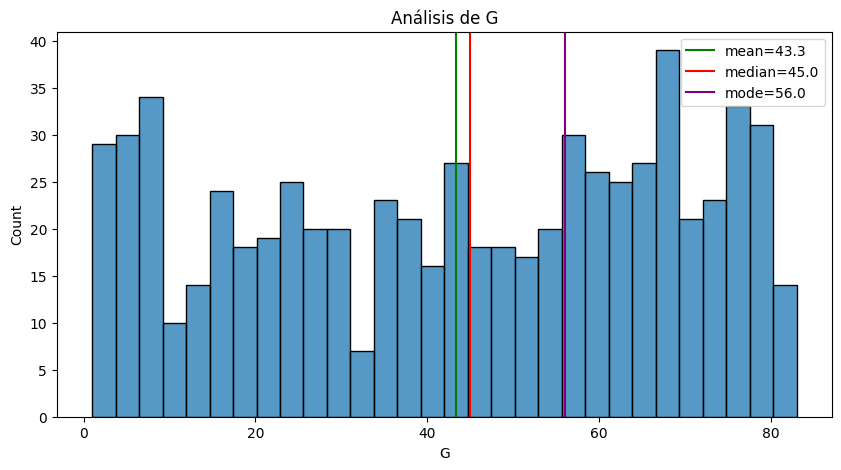

In [15]:
eda = Eda()
eda.univariante_analysis(df, 'G')

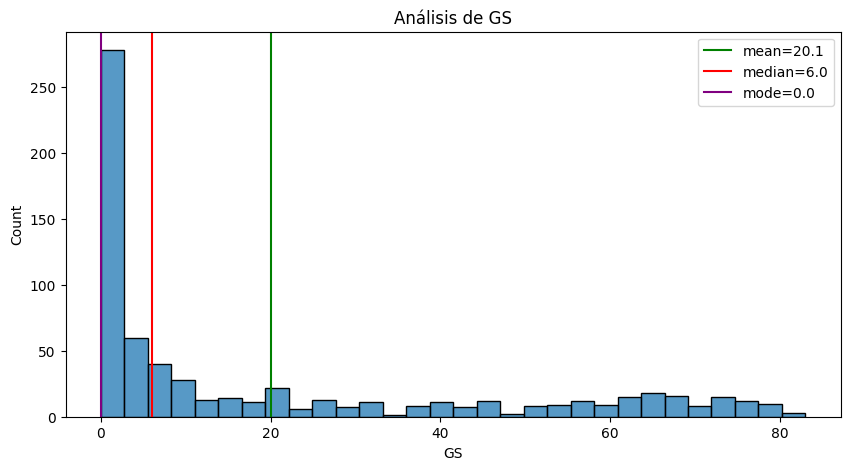

In [16]:
eda = Eda()
eda.univariante_analysis(df, 'GS')

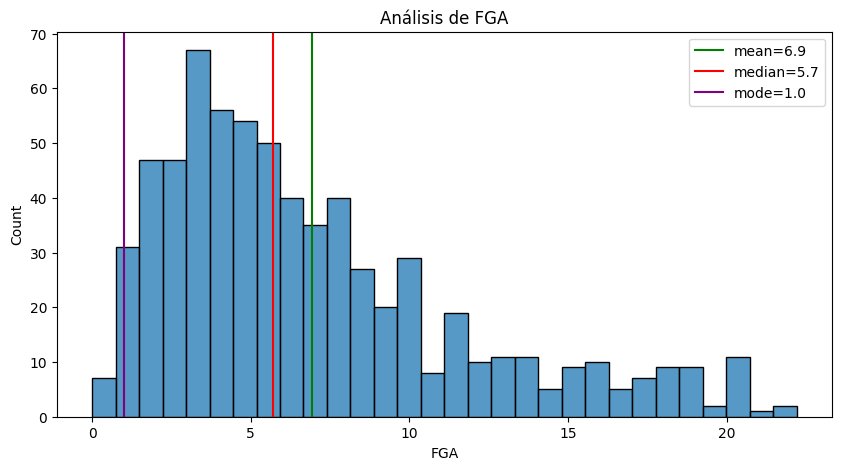

In [19]:
eda = Eda()
eda.univariante_analysis(df, 'FGA')

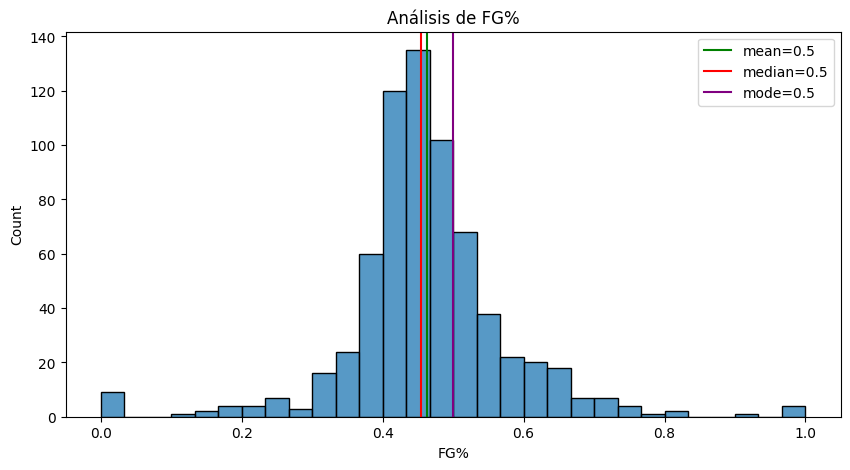

In [20]:
eda = Eda()
eda.univariante_analysis(df, 'FG%')

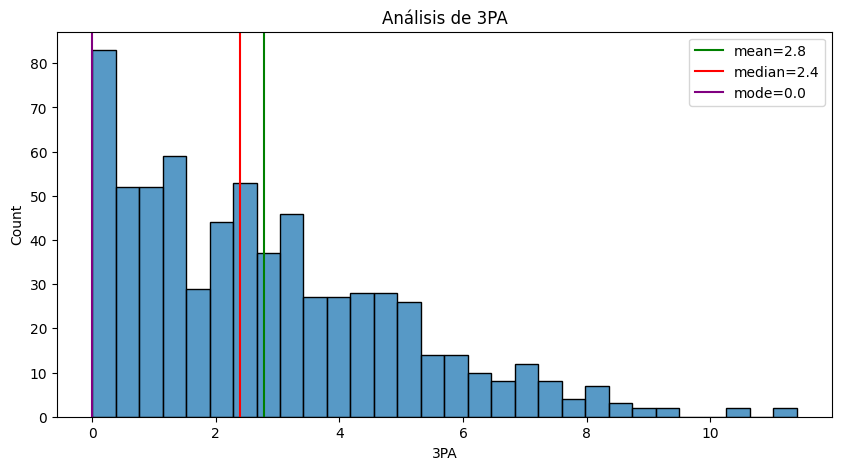

In [22]:
eda = Eda()
eda.univariante_analysis(df, '3PA')

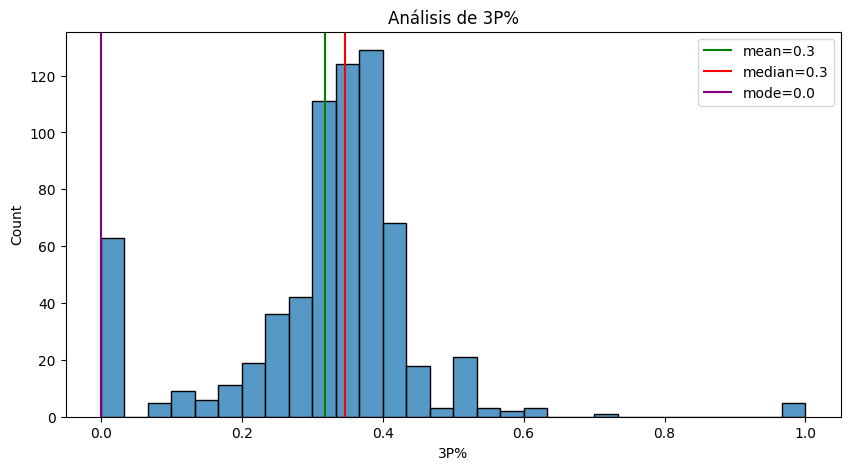

In [23]:
eda = Eda()
eda.univariante_analysis(df, '3P%')

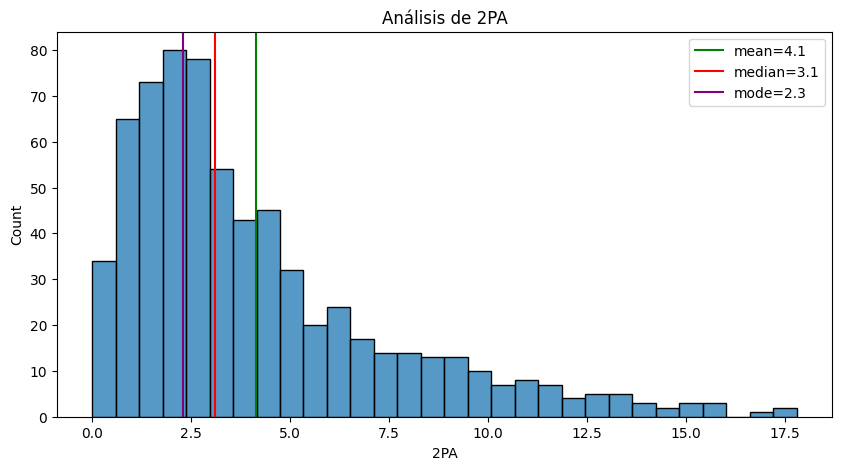

In [25]:
eda = Eda()
eda.univariante_analysis(df, '2PA')

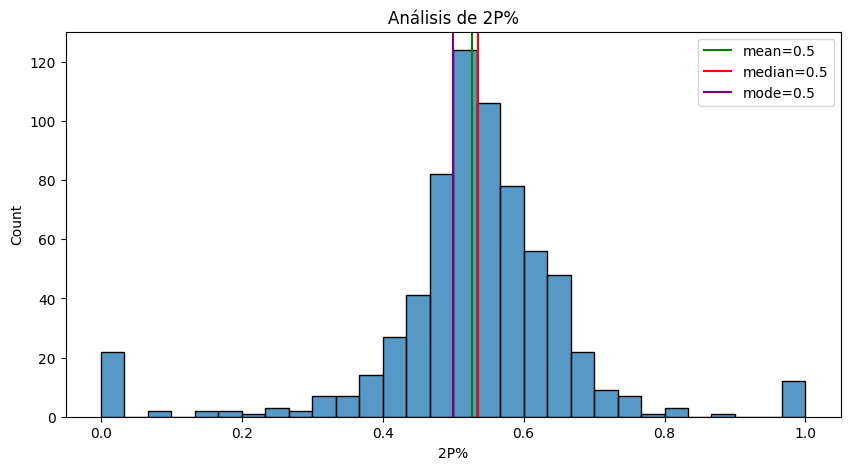

In [27]:
eda = Eda()
eda.univariante_analysis(df, '2P%')

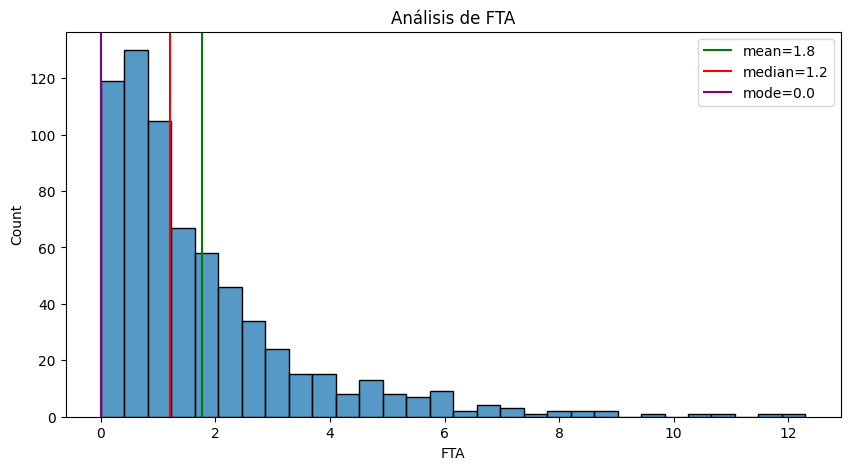

In [30]:
eda = Eda()
eda.univariante_analysis(df, 'FTA')

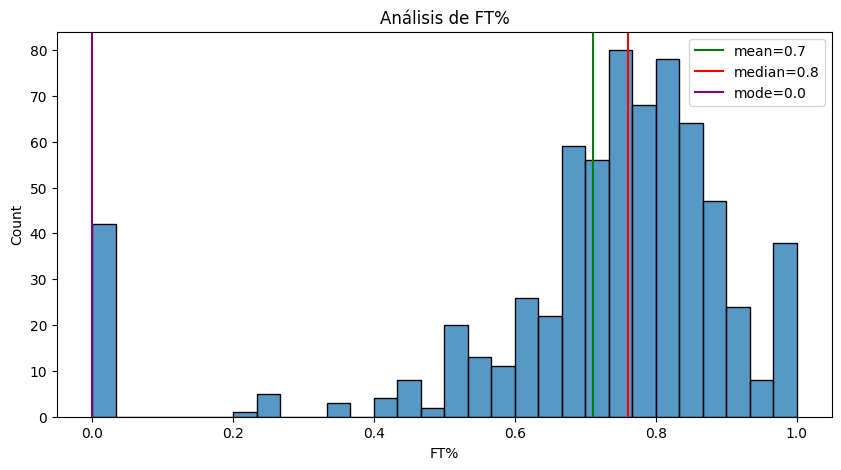

In [31]:
eda = Eda()
eda.univariante_analysis(df, 'FT%')

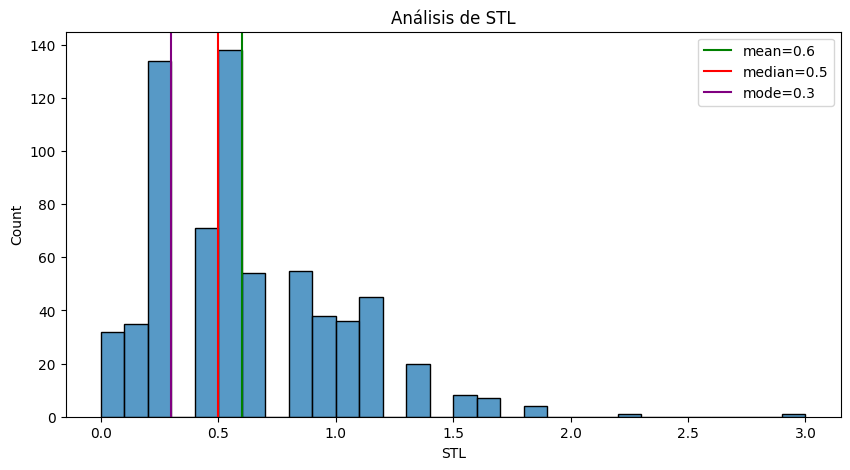

In [36]:
eda = Eda()
eda.univariante_analysis(df, 'STL')

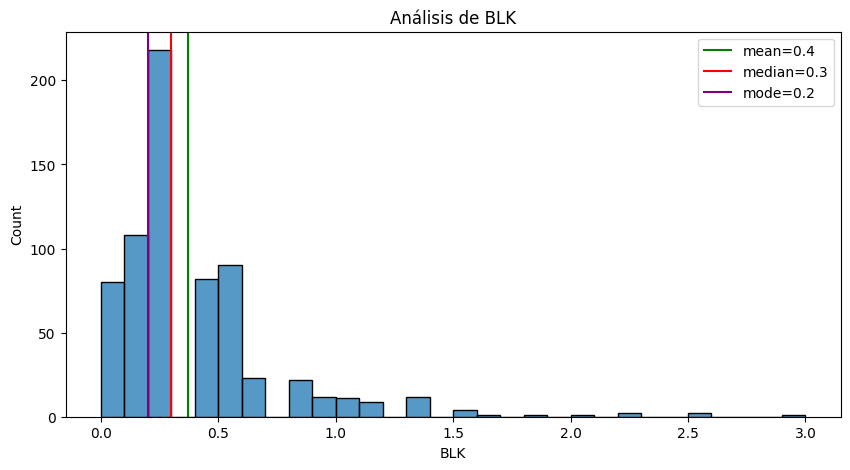

In [37]:
eda = Eda()
eda.univariante_analysis(df, 'BLK')

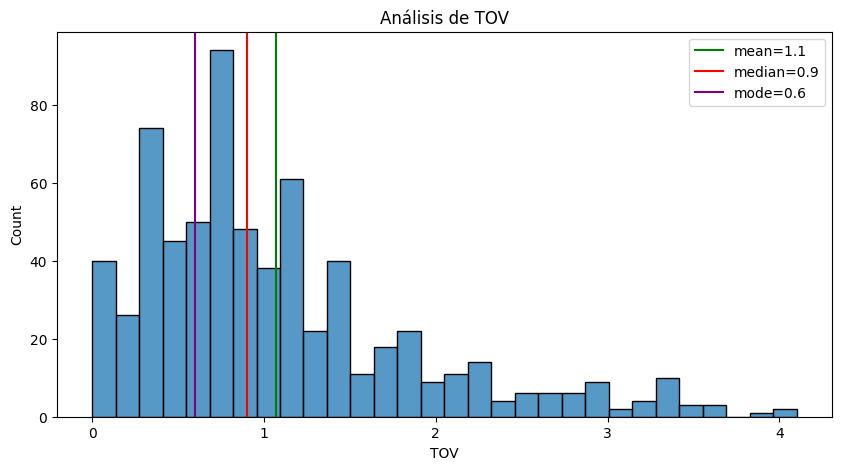

In [38]:
eda = Eda()
eda.univariante_analysis(df, 'TOV')

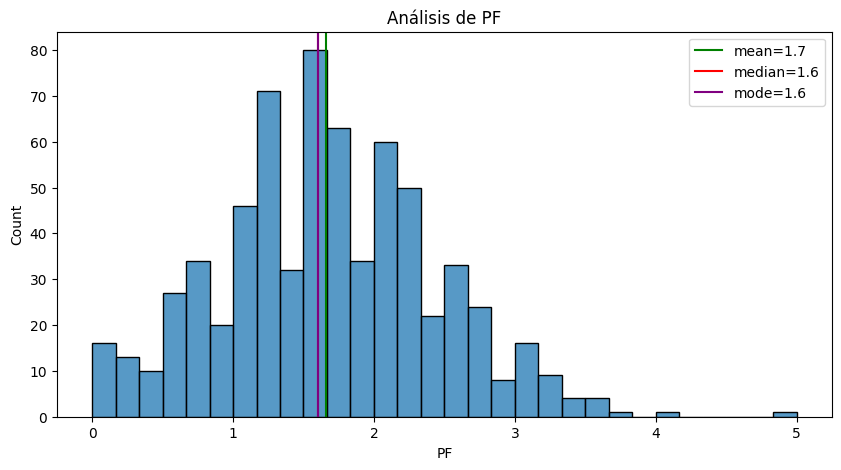

In [39]:
eda = Eda()
eda.univariante_analysis(df, 'PF')

**Ahora que estamos haciendo??que estamos estudiando porke y para que?

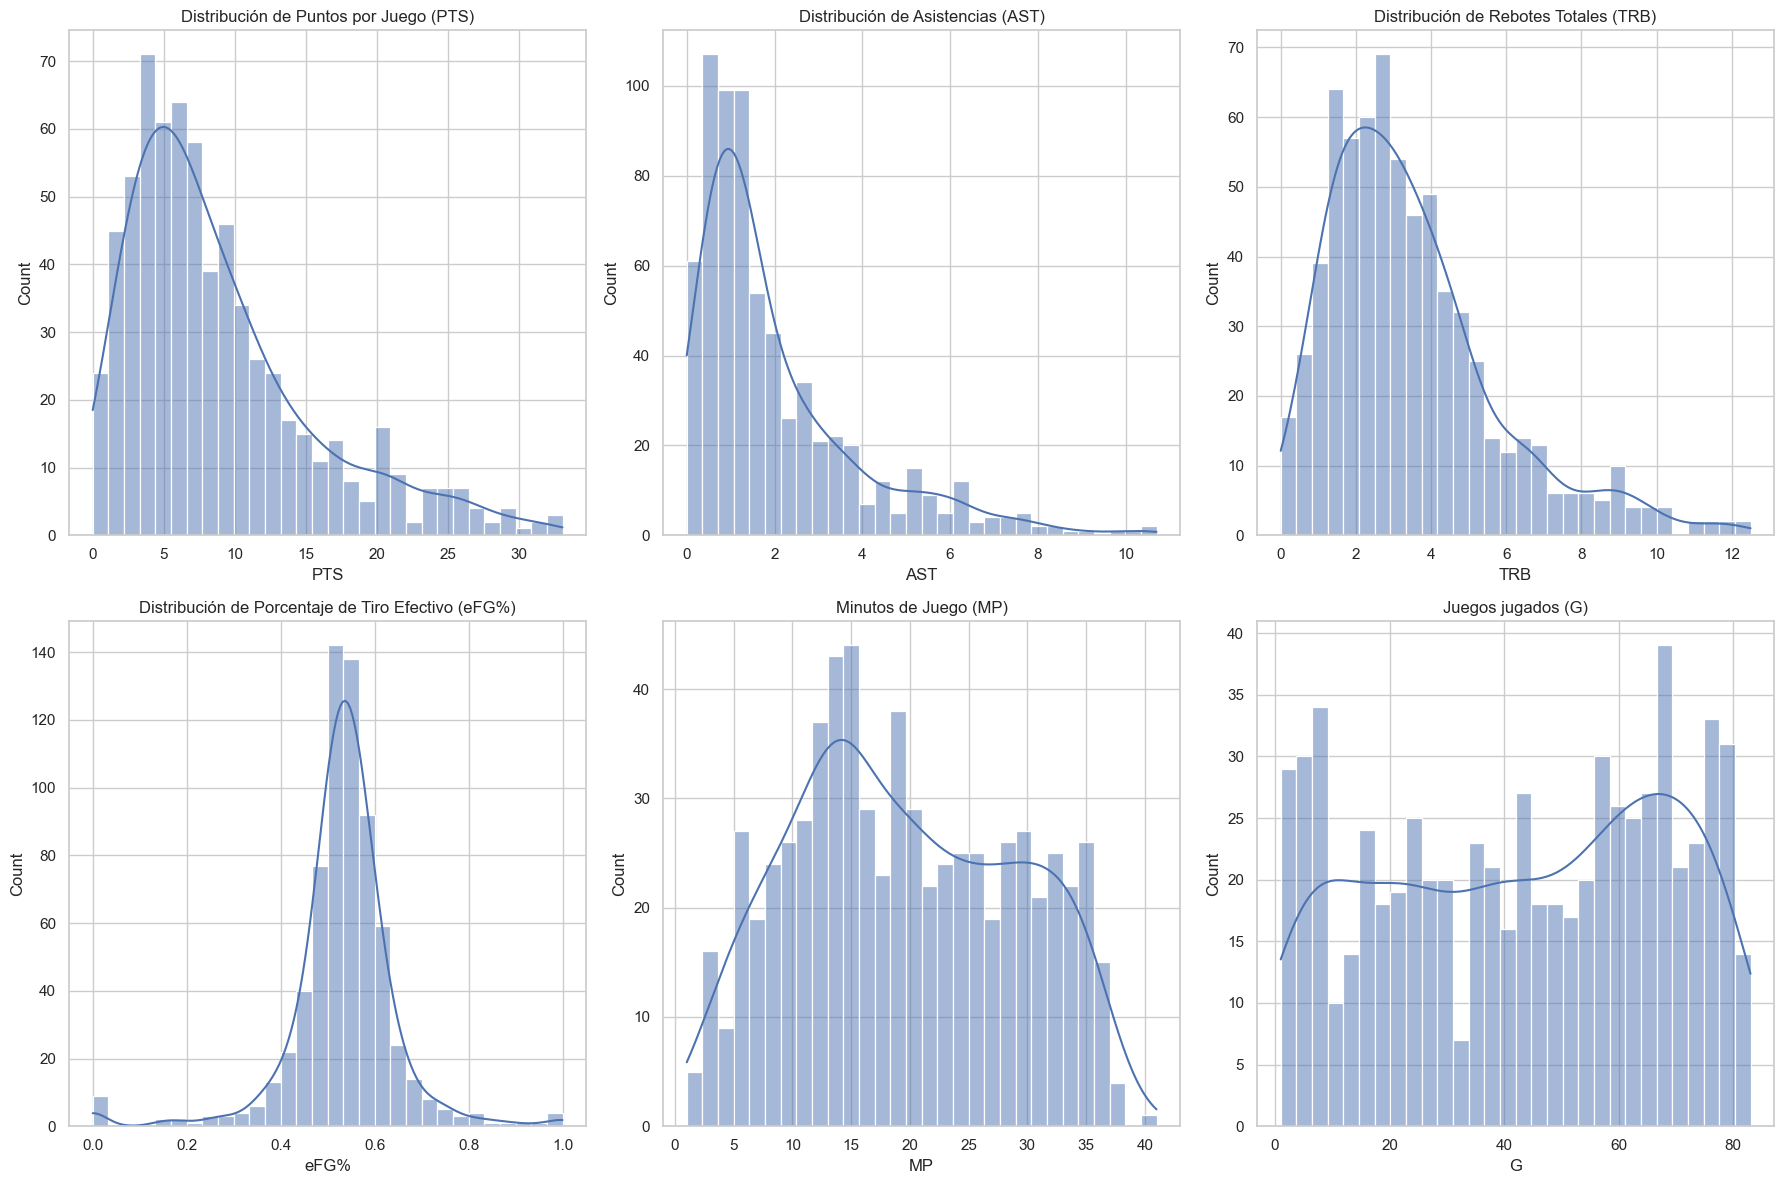

In [23]:


# Configuración de estilos para los gráficos
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribución de Puntos por Juego (PTS)
sns.histplot(df['PTS'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Puntos por Juego (PTS)')

# Distribución de Asistencias (AST)
sns.histplot(df['AST'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de Asistencias (AST)')

# Distribución de Rebotes Totales (TRB)
sns.histplot(df['TRB'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribución de Rebotes Totales (TRB)')

# Distribución de Porcentaje de Tiro Efectivo (eFG%)
sns.histplot(df['eFG%'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de Porcentaje de Tiro Efectivo (eFG%)')

# Distribución de Eficiencia (EFF)
sns.histplot(df['MP'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Minutos de Juego (MP)')

# Distribución de Eficiencia (EFF)
sns.histplot(df['G'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Juegos jugados (G)')

plt.tight_layout()
plt.show()

Los gráficos de distribución proporcionan una visión general de cómo se distribuyen varias estadísticas clave entre los jugadores de la NBA:

* Puntos por Juego (PTS): La mayoría de los jugadores anotan menos de 20 puntos por juego, con una concentración en el rango bajo.
* Asistencias (AST): Similar a los puntos, la mayoría de los jugadores tienen un número bajo de asistencias por juego, con una distribución sesgada hacia la derecha.
* Rebotes Totales (TRB): La distribución de rebotes totales muestra un patrón similar, con la mayoría de los jugadores capturando un número moderado de rebotes por juego.
* Porcentaje de Tiro Efectivo (eFG%): La distribución de eFG% muestra una curva más simétrica, con la mayoría de los jugadores teniendo un porcentaje alrededor del 45% al 55%.
* Eficiencia (EFF): La eficiencia tiene una distribución que se inclina hacia valores más bajos, con una cola más larga hacia valores más altos.
* Los minutos jugados parece aproximarse a una distribución normal, donde la mayoría de los jugadores tienen una cantidad de minutos jugados que se encuentra alrededor del valor más frecuente (que sería la moda de la distribución).
El punto más alto del histograma está alrededor de los 20 a 25 minutos, sugiriendo que esa es la cantidad de minutos más comúnmente jugados por los jugadores.
La distribución muestra una cola hacia la derecha, indicando que hay jugadores que han jugado muchos más minutos que el promedio. La cola a la izquierda es menos pronunciada, lo que indica que hay menos jugadores que juegan muy pocos minutos.
* La distribución de los juegos jugados no es simétrica y parece estar sesgada hacia la derecha, indicando que hay más jugadores que han participado en un número menor de juegos.
Hay varios picos, lo que podría indicar una distribución multimodal. Esto puede suceder si hay subgrupos dentro de la población de jugadores que tienden a jugar un número característico de juegos. Por ejemplo, algunos jugadores pueden ser constantemente seleccionados para jugar casi todos los juegos, mientras que otros pueden participar solo ocasionalmente.
Existe una cola larga hacia la derecha que muestra que algunos jugadores han participado en muchos más juegos que la mayoría. La cola hacia la izquierda es mínima, lo que sugiere que casi todos los jugadores han participado en algunos juegos.

** conteo de posiciones!que estamos observaando?

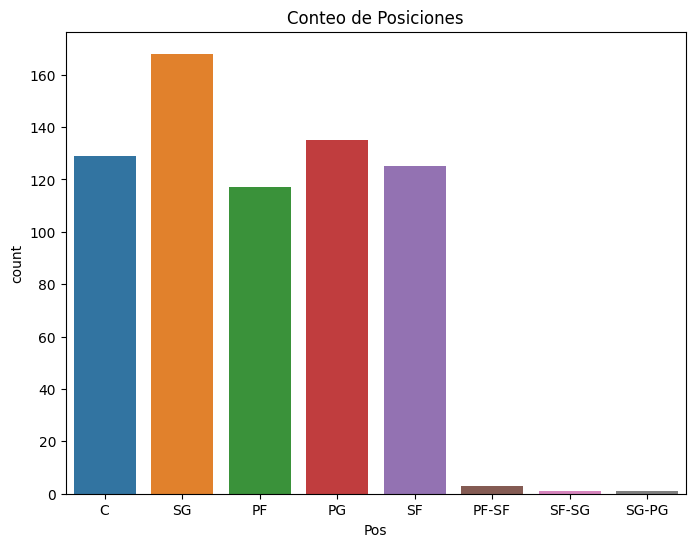

Conteo de valores:
Pos
SG       168
PG       135
C        129
SF       125
PF       117
PF-SF      3
SF-SG      1
SG-PG      1
Name: count, dtype: int64
Porcentaje de valores:
Pos
SG       24.742268
PG       19.882180
C        18.998527
SF       18.409426
PF       17.231222
PF-SF     0.441826
SF-SG     0.147275
SG-PG     0.147275
Name: proportion, dtype: float64


In [45]:
conteo = df['Pos'].value_counts()
porcentaje = df['Pos'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='Pos', data=df) 
plt.title('Conteo de Posiciones') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)


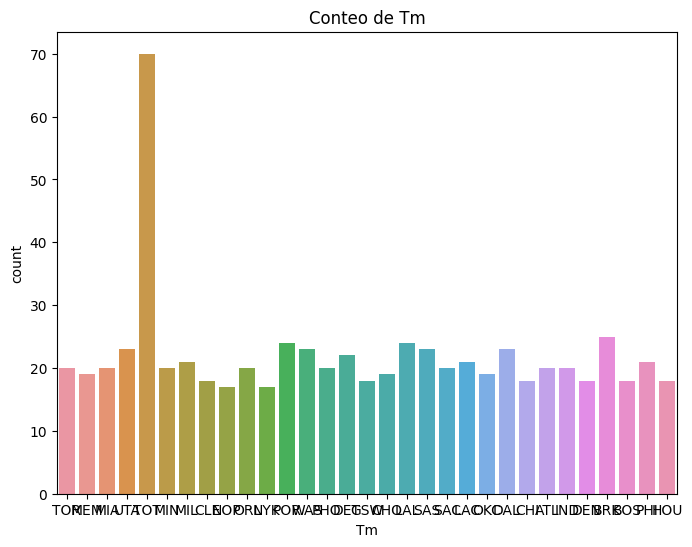

Conteo de valores:
Tm
TOT    70
BRK    25
POR    24
LAL    24
WAS    23
DAL    23
UTA    23
SAS    23
DET    22
LAC    21
MIL    21
PHI    21
SAC    20
TOR    20
PHO    20
IND    20
ORL    20
MIN    20
MIA    20
ATL    20
MEM    19
CHO    19
OKC    19
BOS    18
DEN    18
GSW    18
CHI    18
CLE    18
HOU    18
NYK    17
NOP    17
Name: count, dtype: int64
Porcentaje de valores:
Tm
TOT    10.309278
BRK     3.681885
POR     3.534610
LAL     3.534610
WAS     3.387334
DAL     3.387334
UTA     3.387334
SAS     3.387334
DET     3.240059
LAC     3.092784
MIL     3.092784
PHI     3.092784
SAC     2.945508
TOR     2.945508
PHO     2.945508
IND     2.945508
ORL     2.945508
MIN     2.945508
MIA     2.945508
ATL     2.945508
MEM     2.798233
CHO     2.798233
OKC     2.798233
BOS     2.650957
DEN     2.650957
GSW     2.650957
CHI     2.650957
CLE     2.650957
HOU     2.650957
NYK     2.503682
NOP     2.503682
Name: proportion, dtype: float64


In [44]:

conteo = df['Tm'].value_counts()
porcentaje = df['Tm'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6)) 
sns.countplot(x='Tm', data=df)
plt.title('Conteo de Tm') 
plt.show()

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)


**Todo esto que conclusiones nos da? a que preguntas respone??

**7.2.Análisis bivariante**

**que estamos haciendo para que y a que responde??

In [ ]:
# Calculando el eFG% promedio por equipo
team_efg_avg = df.groupby('Tm')['eFG%'].mean().sort_values()
team_efg_avg

In [ ]:
# Gráfico de barras para eFG% promedio por equipo
plt.figure(figsize=(15, 8))
team_efg_avg.plot(kind='bar')
plt.title('Porcentaje de Tiro Efectivo (eFG%) Promedio por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Tiro Efectivo (eFG%) Promedio')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras muestra el Porcentaje de Tiro Efectivo (eFG%) promedio de cada equipo en la NBA para la temporada 2022-2023. Podemos observar una variación significativa entre los equipos en términos de eficiencia de tiro:

Algunos equipos destacan por tener un eFG% promedio notablemente alto, lo que sugiere una mayor eficiencia en la selección de tiros o en la habilidad de tiro de sus jugadores.
Por otro lado, hay equipos con un eFG% promedio más bajo, lo que podría indicar una selección de tiros menos eficiente o desafíos en la precisión del tiro.

Este análisis proporciona una visión interesante de cómo la eficiencia de tiro varía no solo entre jugadores individuales y posiciones, sino también a nivel de equipo, lo cual es crucial para las estrategias de juego y la evaluación del rendimiento del equipo.

- ¿El equipo (TM) en donde se encuentra los jugadores afecta el rendimiento?

In [ ]:
*** Apartir de aqui no entiendo nada, hay un lio grande.

Tras el estudio bivariante entiendo que surge la idea de hacer la variable Eficiencia global y las nuevas hipotesis a desarrollar y todo el estudio multivariante no??

Donde está el estudio de todas las hipótesis arriba planteadas???